# Bidirectional Encoder Representations from Transformers (BERT)
**BERT (Bidirectional Encoder Representations from Transformers)** is a pre-trained deep learning model developed by Google for natural language processing (NLP) tasks. It uses a transformer-based architecture to learn contextual relations between words in a sentence or text. BERT is trained on a large corpus of text data and can be fine-tuned for various NLP tasks such as question answering, sentiment analysis, and text classification. BERT has achieved state-of-the-art results on several benchmark datasets in the NLP field.

Let's assume you work on a text classification task where input to the model is a word and you want to classify the words either to be person or country. 

<img src = "img.jpg" width = "800px" height = "600px"></img>

<img src = "img2.jpg" width = "800px" height = "600px"></img>

* Now think how the model process these words? Means how can we capture similarities between two words?

<img src = "img1.jpg" width = "800px" height = "600px"></img>

* So the simple answer to the question is: We look to the features of each input word and then compare them with each other if they're similary then will be classify in the same category as shown in the bellow image:
* The image shows us that the first two homes are similar but the third one is not similar with previous two homes.

<img src = "img3.jpg" width = "800px" height = "600px"></img>

* Similarly we represent the person and country names as features and finally we can decide whether it's person or country.

<img src = "img4.jpg" width = "800px" height = "600px"></img>

<img src = "img5.jpg" width = "800px" height = "600px"></img>

<img src = "img6.jpg" width = "800px" height = "600px"></img>

* So the approach covered in the upper images are representing text as number using 'Word2Vec'. The main issue of 'Word2Vec' is, it's generate fixed embedding or generate fixed vectors for similar words. It means one word using with different context might give different meaning, so this is the main issue using 'Word2Vec'.

<img src = "img7.jpg" width = "800px" height = "600px"></img>

* So based on the mentioned problem, we need to have a model to generate contextualize meaning of a word. It means based on studying the whole sentence model will generate a number representation for a specifict word. 
### So BERT allow us to do the exact same thing.

* BERT can generate contextualized embedding. At the same time it will capture the meaning of the word in a right way. As we see in the following image the words 'fair' and 'unbiased' are a kind of similar, so the model will generate almost the same vectors. Similarly the word 'fair' in sentence number 3 in the following image and the word 'Canival' has most similarity, so the model will generate almost the same vectors for these two words.

<img src = "img8.png" width = "800px" height = "600px"></img>

* **BERT** can also generate the embedding for the entire sentence. For the whole sentence it will generate a single vector.**

<img src = "img9.jpg" width = "800px" height = "600px"></img>

* BERT was trained by Google on **2500 Milions words of Wikipedia** and **800 Milions words of different books.**

<img src = "img10.jpg" width = "800px" height = "600px"></img>

* For training they use two approaches:
    1. Mased Language Model
    2. Next sentence prediction
* So today **Google Search** is powered by BERT. When you searching something, when you type the first 1 word or 2 words then they will give you suggestions for your search.

<img src = "img11.jpg" width = "800px" height = "600px"></img>

* Links for more about BERT:
    http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

* Now let's look into tensorflow code and generate some sentence and words embedding.
* So to locate BERT model we go to **tensorflow hub** which is the repository of all the different models. Go to word embedding then to BERT, here you will see a section for BERT. BERT has different models which is listed here... so we'll use the simple one which has 12 encoders. 

In [1]:
# Required libraries:
import tensorflow_hub as hub
import tensorflow_text as text

* BERT models tensorflow hub link: https://tfhub.dev/google/collections/bert/1

In [2]:
# The best thing with BERT is that, we can directly take the URL and past it in the Jupyter ('encoders') to use it. 
# Then for each model we have a pre-processing URL which can pre-process you text.

# preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
# encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

encoder_url = "bert_en_uncased_L-12_H-768_A-12_4"
preprocess_url = "bert_en_uncased_preprocess_3"

In [3]:
# So next we create a hub layer which takes pre-process URL as an argument. It gives you like function pointer. Then we can 
# supply a buch of statements and it will do pre-process on those statements.

bert_preprocess_model = hub.KerasLayer(preprocess_url)


In [4]:
# So let's say here we build a movie classification model. So we pass couple of statements to be pre-processed by the model.
# The output of this function pointer is gonna be dictionary so we just print the key becaus the object may be big:
text_test = ['nice movie indeed','I love python programming']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed.keys()

dict_keys(['input_mask', 'input_type_ids', 'input_word_ids'])

In [5]:
# So the two sentences are pre-processed.
# Now we can check individual elements in this dictionary. The first one is 'input_mask'. 
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

* So we see the shape is (2, 128), 2 is because of: we have two sentences, and for each sentence we see the mask. So as we see the first sentence has three words but the BERT generated 5 ones (1s). The reason is the way BERT work, it add a special token called 'CLS' at the beginning and to separte two sentences it use 'SEP' token. Now if we count it it will be 5. The idea is similar for the second sentece. 128 is a kind of maximum lenght of the sentence.


In [6]:
# So the next element is 'input_type_ids' which is pretty usefull. So it assign special number to each word because this is 
# pre-proecssing step, in next step we do word embedding.

# text_preprocessed['input_type_ids']
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

### Special Tokens:
* **101 --> CLS token**
* **102 --> SEP token**

In [7]:
# Once the pre-processing steps is done, we want to create another layer and it will have the encoder URL.
# This layer we'll called BERT model. So as before it will return like function pointer and we can supply our pre-process 
# text and as result it will generate word embedding for the sentencess.
# Again we just call the keys.

bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed)
bert_results.keys()

dict_keys(['default', 'encoder_outputs', 'pooled_output', 'sequence_output'])

In [8]:
# So this will have three keys, the first one is 'pooled_output'. 
# 'Pooled_output' is the embedding for the entire sentence.
bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7917739 , -0.214119  ,  0.49769554, ...,  0.2446523 ,
        -0.4733446 ,  0.8175868 ],
       [-0.91712296, -0.4793517 , -0.7865697 , ..., -0.6175173 ,
        -0.7102685 ,  0.92184293]], dtype=float32)>

* So we see, we had two sentences, and we see the embedding for the two sentences. The embedding vector size is 768. So this vector nicely represent the statement 'nice movie indeed' in form of numbers. Similarly we have other embedding vector for the 2nd sentence.
* So these embeddings are pretty powerful and we can use it for our NLP task, it could be movie review classification, name entity recognization, it could be anything, but BERT help you to generate a meaningful vectors out of your statement.

In [9]:
# Now let's look out to the 2nd key which is 'sequence_output'. 
# 'sequence_output' is individual word embedding vectors. 2 is again for 2 sentences, 128 means: we've 128 padding for each
# sentence and for each of the word inside the sentence we will have 768 size vector.
# The paddings (numbers) are because of contextualize embedding. 
bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.07292053,  0.08567811,  0.14476846, ..., -0.09677067,
          0.08722128,  0.07711104],
        [ 0.1783935 , -0.19006078,  0.5034942 , ..., -0.05869839,
          0.32717115, -0.15578555],
        [ 0.18701448, -0.43388778, -0.48875168, ..., -0.15502736,
          0.00145129, -0.2447096 ],
        ...,
        [ 0.12083042,  0.1288426 ,  0.4645356 , ...,  0.07375526,
          0.17441978,  0.165221  ],
        [ 0.07967852, -0.01190632,  0.50225437, ...,  0.13777742,
          0.21002209,  0.00624598],
        [-0.07212704, -0.28303427,  0.5903336 , ...,  0.47551903,
          0.16668484, -0.08920316]],

       [[-0.0790059 ,  0.3633513 , -0.21101557, ..., -0.1718373 ,
          0.16299753,  0.6724265 ],
        [ 0.27883515,  0.43716335, -0.3576473 , ..., -0.04463643,
          0.38315186,  0.5887984 ],
        [ 1.2037671 ,  1.0727018 ,  0.4840877 , ...,  0.24921034,
          0.40730911,  0.4048181 ],
        ...,

In [10]:
# If you look at 'encoder_output', if we display the len of 'encoder_output', it will be 12. The reason is we're use the 
# small size BERT base. Means this BERT model has 12 encoder layers and each layer has 768 size embedding vectors.
len(bert_results['encoder_outputs'])

12

In [11]:
# The output of 'encoder_output' is nothing but the output of each individual encoder. 
bert_results['encoder_outputs'][0]

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.12901425,  0.00644747, -0.0361497 , ...,  0.04999633,
          0.06149192, -0.02657545],
        [ 1.1753384 ,  1.2140784 ,  1.1569979 , ...,  0.11634396,
         -0.35855335, -0.40490183],
        [ 0.03859042,  0.5386996 , -0.21089777, ...,  0.21858197,
          0.7260167 , -1.1158603 ],
        ...,
        [-0.07587016, -0.254219  ,  0.7075511 , ...,  0.50541997,
         -0.1887868 ,  0.15028326],
        [-0.16066615, -0.28089687,  0.5759706 , ...,  0.52758557,
         -0.11141385,  0.02887541],
        [-0.0442816 , -0.2027959 ,  0.5909355 , ...,  0.8133834 ,
         -0.39075816, -0.02601739]],

       [[ 0.1890359 ,  0.02752548, -0.0651374 , ..., -0.00620213,
          0.15053894,  0.03165445],
        [ 0.5916149 ,  0.7589137 , -0.07240661, ...,  0.6190394 ,
          0.8292891 ,  0.16161954],
        [ 1.4460827 ,  0.44602644,  0.4099025 , ...,  0.48255914,
          0.62691146,  0.13463417],
        ...,

* To get more about the elements, you can simply check the https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4 link.

* **So here next we do email classification using BERT whether email is spam or not spam?**

<img src = "img12.jpg" width = "800px" height = "600px"></img>

* So BERT will convert the email sentences (the whole email) into an embedding vectors as we saw before that the whole concept of BERT is to generate the embedding vectors for the entire sentence, so that is something that we can feed it to the neural network and do the training.
* So we'll generate an embedding vectors of 768 lenght, and then we'll supply a very simple neural network with only one dense layer (one neuron in the dense layer). As an output wi'll also put a dropout layer just to tackle the model overfitting.

<img src = "img13.jpg" width = "800px" height = "600px"></img>

* Now when you open the BERT box by the way, it has two components (pre-process and encoding) which we covered them previously. 

<img src = "img14.jpg" width = "800px" height = "600px"></img>

* Let's jump to the coding...

In [12]:
# Required libraries:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

In [13]:
# So the dataset which we have here is having two columns, the first one is email category and the second one is the email
# text. So let's simply read the CSV file into the notebook:
df = pd.read_csv("spam.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# So now let's do some basic analysis. 
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [16]:
# So we clearly see some imbalance in the dataset. 
df["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [17]:
# So here we use 'Under-sampling' method to tackle with this problem.
# Let's check the ratio between thses two classes:
747/4825

0.15481865284974095

* So we see that 15% are spam emails and 85% are non spam emails. So the under-sampling method says that from 4825 non spam emails just pick up 747 samples and discards the others and then join it with the spam (747) emails and train the model. This is not good approach but to keep thing simple we go through this approach.


In [18]:
# So here we create a new DataFrame for 'spam' emails:
df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [19]:
# Similarly we create a new DataFrame for 'ham' emails:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [20]:
# So now if we do like 'df_ham.sample(2)', then it will return 2 random samples.
df_ham.sample(2)

,Category,Message
3962,ham,Your dad is back in ph?
5049,ham,Yeah so basically any time next week you can g...


In [21]:
# So instead of 2 samples we need 747 samples.
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [22]:
# So now we can join these two dataset for model training.
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(1494, 2)

In [23]:
# Now to check the samples from both classes:
df_balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [24]:
# Now just to priint some samples from the balanced data frame:
df_balanced.sample(5)

,Category,Message
5283,ham,"Yeah, probably here for a while"
3807,spam,URGENT! We are trying to contact you. Last wee...
3020,ham,Wat time do u wan 2 meet me later?
2708,spam,Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
2626,spam,"FREE RING TONE just text ""POLYS"" to 87131. The..."


In [25]:
# Next we create a new column for spam and ham to be represented as 1 and 0.
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
635,spam,"Dear Voucher Holder, 2 claim this weeks offer,...",1
2670,spam,we tried to contact you re your response to ou...,1
4529,ham,HOW ARE U? I HAVE MISSED U! I HAVENT BEEN UP 2...,0
3334,spam,You are being contacted by our dating service ...,1
4221,ham,U free on sat rite? U wan 2 watch infernal aff...,0


In [26]:
# Now the DataFrame is ready and we can call train_test_split method for generating train and test samples.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'],df_balanced['spam'], stratify=df_balanced['spam'])

In [27]:
# To see some train values:
X_train.head(4)

2084    you are sweet as well, princess. Please tell m...
1745    Someone has conacted our dating service and en...
4681    That's cool he'll be here all night, lemme kno...
967     I am not sure about night menu. . . I know onl...
Name: Message, dtype: object

**Now let's get embedding vectors using BERT model for few sample statements**

In [32]:
# So now as we have seen previously, we call BERT model and supply sentences to BERT model to generate the length vectors. 
# So we want to create a simple function to take sentence as input and return the embedded vectors as output.
# So first the function takes the sentences, first we apply pre-processing and as result we get pre-precessed text and then 
# that we suppply to encoder. Then it will return a dictionary and from dictionary it will return 'pooled_output'.

bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(encoder_url)

def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"
])


<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351707, -0.5132726 , -0.8884572 , ..., -0.74748856,
        -0.75314724,  0.91964495],
       [-0.8720835 , -0.50543964, -0.94446677, ..., -0.8584752 ,
        -0.7174535 ,  0.8808299 ]], dtype=float32)>

* So we see it's returning a tensor of 2 with 768 shape. Each tensor is embedding for a single sentence.

In [33]:
# Now let's call 'get_sentence_embedding' for some sample words to see what is the benefits of having BERT encoding:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [34]:
# Now 'e' is the embedding of all given words:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606918 , -0.14219396,  0.49604586, ...,  0.42165315,
        -0.5322141 ,  0.80312175],
       [-0.86023223, -0.21242936,  0.4915693 , ...,  0.3979806 ,
        -0.60506284,  0.8447163 ],
       [-0.71288604, -0.15463905,  0.38401675, ...,  0.3527874 ,
        -0.5099133 ,  0.73474073],
       [-0.82533467, -0.35550582, -0.590697  , ..., -0.01613692,
        -0.6141757 ,  0.872303  ],
       [-0.75041336, -0.2681263 , -0.26689765, ...,  0.02839323,
        -0.5938099 ,  0.7974989 ],
       [-0.7854437 , -0.2994969 ,  0.41027388, ...,  0.5222541 ,
        -0.49573544,  0.815075  ]], dtype=float32)>

* So from these six words we can figure out that the vectors of the first three words will be similar because the words are for fruits and the vectors of the three last words will be also similar because they're same and the're humans.

In [40]:
# So we'll try cosine similarity to check the vectors similarity, cosine similarity is a way to show how two vectors are 
# similary? If two vectors are in the ame direction then the cosine similarity will be closed to 1.
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911089]], dtype=float32)

In [41]:
# So next we create a classification model. Threr are two ways of creating the tensorflow model (Sequential & Functional).
# Till now we've created 'Sequential Models'. The benefits of using 'Functional Model' is, in this model we'll have non 
# sequencial type of architechture where we can have two inputs and two outputs and we can build complex model.
# So we're going to use 'Functional' approach here. 
# First we create input layer, first we supply shape then data type which will be string and then the name of the layer.
# Next we pass the input layer to pre-process, what we get as result will be a pre-processed text.
# Next we supply the pre-processed text into BERT-Encoder. So these will be BERT layers.
# Next we create a neural network layers. So in NN we'll use Dropout layer because it help prevent model overfitting.
# The 2nd layer is dense which will have only one neuron because it's answering us whether email is spam or not.
# Next we construct the model.

# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

* To know more about **'Sequencial and Functional Models' in Keras**, follow the bellow link: https://becominghuman.ai/sequential-vs-functional-model-in-keras-20684f766057

In [42]:
# To print the model summary:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [43]:
# Now let's compile the model:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [44]:
# Next we train a model:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 441s 12s/step - loss: 0.7029 - accuracy: 0.5339 - precision: 0.5341 - recall: 0.5321
Epoch 2/10
35/35 [==============================] - 481s 14s/step - loss: 0.5555 - accuracy: 0.7696 - precision: 0.7568 - recall: 0.7946
Epoch 3/10
35/35 [==============================] - 526s 15s/step - loss: 0.4697 - accuracy: 0.8366 - precision: 0.8256 - recall: 0.8536
Epoch 4/10
35/35 [==============================] - 432s 12s/step - loss: 0.4162 - accuracy: 0.8571 - precision: 0.8460 - recall: 0.8732
Epoch 5/10
35/35 [==============================] - 378s 11s/step - loss: 0.3792 - accuracy: 0.8839 - precision: 0.8620 - recall: 0.9143
Epoch 6/10
35/35 [==============================] - 380s 11s/step - loss: 0.3528 - accuracy: 0.8848 - precision: 0.8748 - recall: 0.8982
Epoch 7/10
35/35 [==============================] - 378s 11s/step - loss: 0.3345 - accuracy: 0.8857 - precision: 0.8711 - recall: 0.9054
Epoch 8/10
35/35 [=======================

In [47]:
# To evaluate the model performance test data:
model.evaluate(X_test, y_test)

12/12 [==============================] - 124s 10s/step - loss: 0.2881 - accuracy: 0.9198 - precision: 0.8985 - recall: 0.9465


[0.28805819153785706,
 0.9197860956192017,
 0.8984771370887756,
 0.9465240836143494]

In [48]:
# Next we predict the 'X_test' which is a two dimension array and then we flatten it to become one dimension.
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

12/12 [==============================] - 125s 10s/step


In [49]:
# Then as sigmoid is a bunch of sigmoid values like 0.7, 0.3, 0.2, 0.9 ... so we said if the value is greater than 0.5 print
# 1, in other case print 0.  
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,

In [50]:
# Than we've y_test, so using y_predicted and y_test we can plot a confusion matrix.
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[167,  20],
       [ 10, 177]], dtype=int64)

Text(33.0, 0.5, 'Truth')

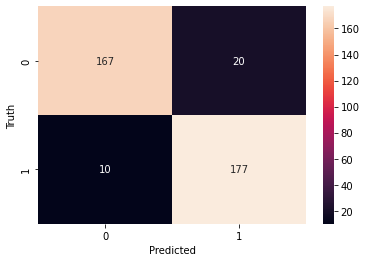

In [51]:
# Confusion matrix on a better way:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
# To print a classification report:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       187
           1       0.90      0.95      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



**Inference**

In [53]:
# So here we provide five sentences for prediction:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)

1/1 [==============================] - 3s 3s/step


array([[0.7637597 ],
       [0.81557024],
       [0.7543627 ],
       [0.19859484],
       [0.09751444]], dtype=float32)

In [54]:
# From probability we see that the first three sentences are looking to be spam so thats why it's probability is higher than
# 0.5%. The last two sentences are looking to be not spam so it's probability is lower than 0.5.